# Simple Polynomial Regression

### Dataset: 
```
https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionCo2.csv
```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
# Select some features to explore
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


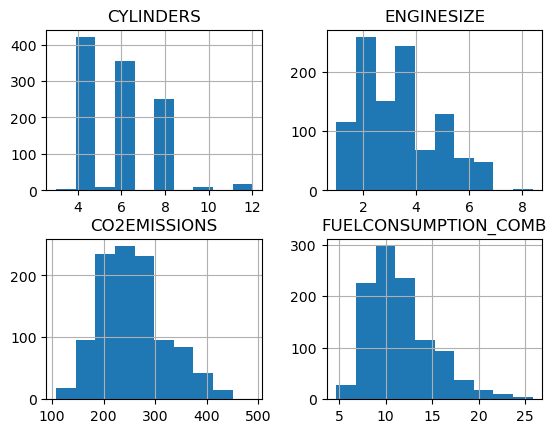

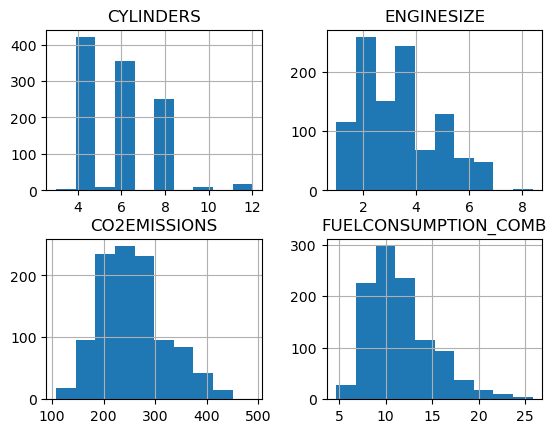

In [12]:
viz = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show() 

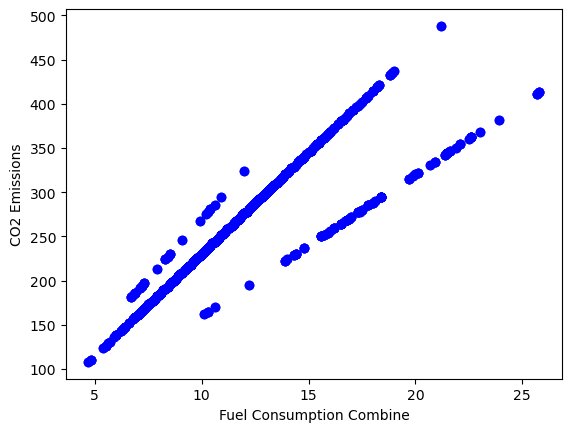

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combine')
plt.ylabel('CO2 Emissions')
plt.show()

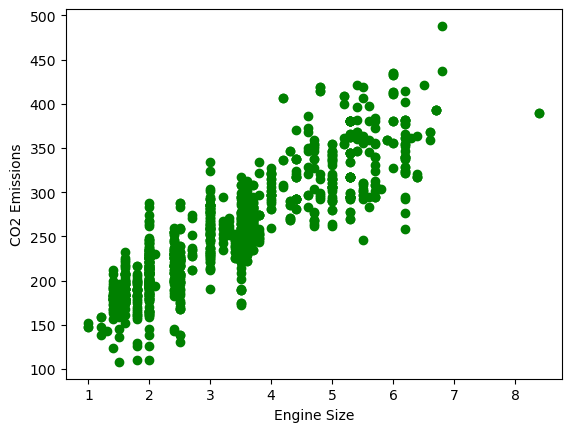

In [16]:

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Create train and test dataset
Create two sets that are mutually exclusive. After which you will train your engine, and test with test set.


In [17]:
# Split data using numpy
msk = np.random.rand(len(df)) < 0.8 # train data 80%
train = cdf[msk] # 80%
test = cdf[~msk] # the other 20%

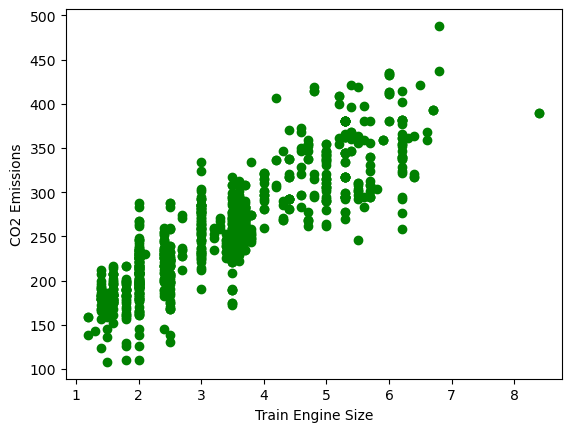

In [18]:
# See train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel('Train Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [19]:
# Do the model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']]) # must be 2d array
train_y = np.asarray(train[['CO2EMISSIONS']])
model1 = regr.fit(train_x, train_y)

In [20]:
print(f'Coefficient: {model1.coef_}')
print(f'Intercept: {model1.intercept_}')

Coefficient: [[39.38929709]]
Intercept: [124.63152547]


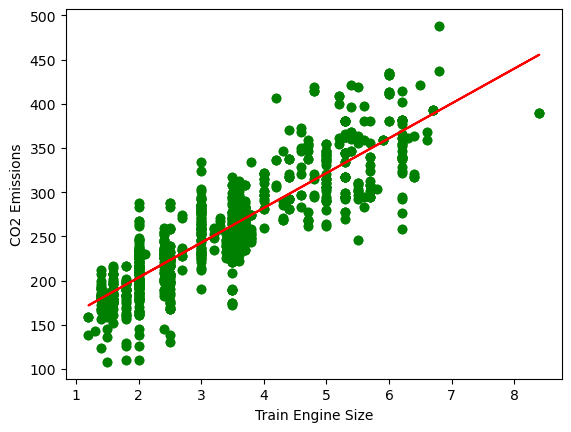

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel('Train Engine Size')
plt.ylabel('CO2 Emissions')
plt.plot(train_x, model1.coef_[0][0]*train_x + model1.intercept_[0], '-r') # coeff is 2d, intercept is 1d
plt.show()

In [27]:
# Evaluate the model
# Mean Absolute error, Residual Square Error, R-Square
from sklearn.metrics import r2_score, mean_absolute_error
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model1.predict(test_x)

mae = mean_absolute_error(test_y,test_y_)

print(f'Mean absolute Error: {np.mean(np.absolute(test_y_- test_y))}')
print(f'MSE: {np.mean(test_y_ - test_y)**2}')
print(f'R-Squared: {r2_score(test_y, test_y_)}')
print(f'Mean absolute Error using library: {mae}')

Mean absolute Error: 21.027216807491914
MSE: 1.1296375557520506
R-Squared: 0.7843137658047653
Mean absolute Error using library: 21.027216807491914


### Repeat the process using FUELCONSUMPTION_COMB and CO2EMISSIONS

In [25]:
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['FUELCONSUMPTION_COMB']])  # must be 2d array
train_y = np.asarray(train[['CO2EMISSIONS']])
model2 = regr.fit(train_x, train_y)
print(f'Coefficient: {model2.coef_}')
print(f'Intercept: {model2.intercept_}')

Coefficient: [[16.14776317]]
Intercept: [69.68917805]


In [ ]:
# finish the model

Multiple Regression model

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x  = np.asarray(train[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
multi_model = regr.fit(x,y)
print(f' coef: {multi_model.coef_}')


 coef: [[ 7.62978235 10.6790991   9.70045386]]


In [31]:
# get predictions
y_hat = multi_model.predict(
    test[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(
    test[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

c:\Users\assse\anaconda3\envs\module4\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [32]:
print(f'MSE: {np.mean(y_hat - test_y)**2}')
print(f'R-Squared: {r2_score(test_y, y_hat)}')
print(f'Mean absolute Error using library: {
      mean_absolute_error(test_y, y_hat)}')

MSE: 2.3858547202550495
R-Squared: 0.857949628207655
Mean absolute Error using library: 15.67967717179501


### Try multiple linear regression
FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY
Does it results in a better accuracy?

### Polynomial regression

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [34]:
# split data
# Split data using numpy
msk = np.random.rand(len(df)) < 0.8  # train data 80%
train = cdf[msk]  # 80%
test = cdf[~msk]  # the other 20%


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

In [40]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [41]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
print(f'Coefficients: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

TypeError: Singleton array array(LinearRegression(), dtype=object) cannot be considered a valid collection.

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
XX = np.arange(0.0, 10.0, 0,1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel('Poly Model Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

TypeError: Cannot interpret '1' as a data type